8 41 [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63]
10 33 [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63]
12 28 [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63]
16 24 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
24 20 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
32 18 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
14 41
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 2

/Users/ilaria/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in double_scalars


IndexError: index 3 is out of bounds for axis 2 with size 3

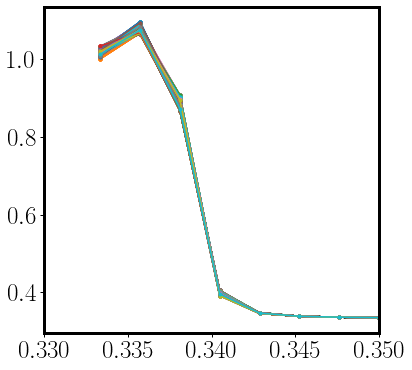

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

bare_Tc=[]
bare_Tc_err=[]
nu_list=[]

e=0
nu=0
h=1
rho=1
eta1=0
eta2=1
blow=0.3
bhigh=0.45
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/Users/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L)+1)))
c_m=next(color)

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_ylim((-1,1))
ax1.set_xlim((0.33,0.35))

nbeta_new=[]
index1_list=[]
index2_list=[]
for l in range(len(L)):
    HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]
    U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
    #cut U_all
    index1=np.where(U<0.9)[0]
    index2=np.where((U+err_U)>0.34)[0][-1]
    print(L[l], index2, index1)
    nbeta_new.append(len(index1))
    index2_list.append(index2)
    index1_list.append(index1[0])

nbeta_cut=min(nbeta_new)
start=min(index1_list)
end=max(index2_list)
print(start, end)
nbeta_cut=end-start
U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))

for l in range(len(L)):
    
    for n in range(N_dataset):
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta[start:end], U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>=(U_cross[n,:, l2]))[0]
            print(condition)

            if(condition.size>0):
                print(condition)
                index1=condition[-1]
                index2=index1+1
                x1= beta[index1]
                y1= Js_cross[n,index1, l1]
                x2= beta[index2] 
                y2=Js_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= Js_cross[n,index1, l2]
                y2=Js_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")

betac_finitesize=[]
err_betac_finitesize=[]

for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]), ls="--")
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
ax2.set_ylabel("$T_c(Z_2)$")
ax2.set_xlabel("$L_{i}, L_{i+1}$")
pair_l=[]

pair_l=np.arange(0,len(L)-1, 1 )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )

[0 1]


<ErrorbarContainer object of 3 artists>

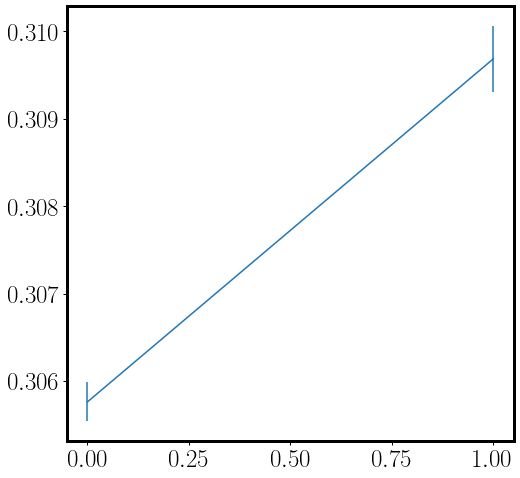

In [7]:
betac_finitesize=[]
err_betac_finitesize=[]

pair_l=[]
for l in range(len(L)-1):
    betac_finitesize.append(np.mean(betac_cross[:,l]))
    err_betac_finitesize.append( np.std(betac_cross[:,l])/np.sqrt(100-1))

pair_l=np.arange(0,len(L)-1, 1 )
print(pair_l)
plt.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )